In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, xticks
%matplotlib inline

DATA_DIR = '.'

# Load Data

In [20]:
data = pd.DataFrame()

In [21]:
total_data = [500, 1000, 2500, 5000, 7500, 11852]

for x in total_data:
    data = pd.concat([
     data,   
     pd.read_csv('{}/final_toxic_toxic_XLM_R_result_combined_{}.csv'.format(DATA_DIR, x))
    ])

print(data.shape)
data.head()

(96, 7)


,tipe,total_data,foreign_mult,total_foreign_data,max_f1,max_recall,max_precision
0,A,500,0.25,0,0.356934,1.000000,0.555049
1,B,500,0.25,0,0.375292,0.067031,0.859649
2,C,500,0.25,125,0.582803,0.883721,0.618774
3,C,500,0.50,250,0.593296,0.894665,0.624642
4,C,500,0.75,375,0.558302,0.946648,0.610229


# Plot F1 By Total Data for each Type

In [22]:
# data.loc[(data['tipe'] == 'A') | (data['tipe'] == 'B'), 'foreign_mult'] = data[(data['tipe'] == 'A') | (data['tipe'] == 'B')].foreign_mult.apply(lambda x: 0)
data.loc[(data['tipe'] == 'A'), 'foreign_mult'] = data[(data['tipe'] == 'A')].foreign_mult.apply(lambda x: 0)
data.loc[(data['tipe'] == 'B'), 'foreign_mult'] = data[(data['tipe'] == 'B')].foreign_mult.apply(lambda x: -1)

In [23]:
data = data.sort_values(by=['total_data', 'foreign_mult'])
data.head(20)

,tipe,total_data,foreign_mult,total_foreign_data,max_f1,max_recall,max_precision
1,B,500,-1.00,0,0.375292,0.067031,0.859649
0,A,500,0.00,0,0.356934,1.000000,0.555049
2,C,500,0.25,125,0.582803,0.883721,0.618774
3,C,500,0.50,250,0.593296,0.894665,0.624642
4,C,500,0.75,375,0.558302,0.946648,0.610229
5,C,500,1.00,500,0.557812,0.942544,0.609735
6,C,500,1.50,750,0.624812,0.876881,0.642929
7,C,500,2.00,1000,0.644358,0.864569,0.656282
8,C,500,3.00,1500,0.648320,0.860465,0.659329
9,C,500,4.00,2000,0.619859,0.900137,0.639456


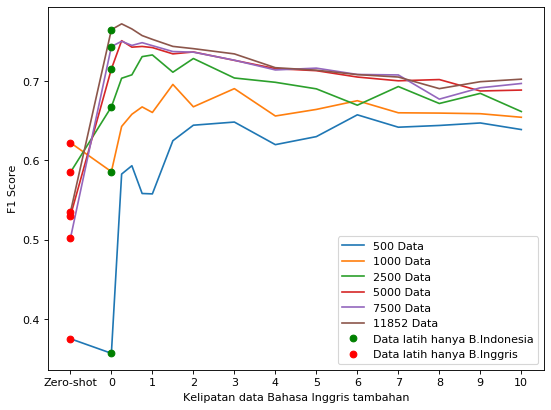

In [24]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

total_data = [500, 1000, 2500, 5000, 7500, 11852]

for x in total_data:
     plt.plot(data[(data['total_data'] == x )].foreign_mult.values,
        data[(data['total_data'] == x)].max_f1.values,
        
        label='{} Data'.format(x))
    
plt.plot(data[(data['tipe'] == 'A' )].foreign_mult.values,
data[(data['tipe'] == 'A')].max_f1.values,
'go',
label='Data latih hanya B.Indonesia'.format(x))

plt.plot(data[(data['tipe'] == 'B' )].foreign_mult.values,
data[(data['tipe'] == 'B')].max_f1.values,
'ro',
label='Data latih hanya B.Inggris'.format(x))

xticks([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ['Zero-shot', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

plt.legend(loc="lower right")
plt.xlabel('Kelipatan data Bahasa Inggris tambahan')
plt.ylabel('F1 Score')
plt.title('')
plt.savefig('plot.png')
plt.show()

In [25]:
total_data = [500, 1000, 2500, 5000, 7500, 11852]
diff = 0
for x in total_data:
    cur_diff = data[(data['total_data'] == x) & (data['tipe'] == 'A')].max_f1.values[0] - data[(data['total_data'] == x) & (data['tipe'] == 'B')].max_f1.values[0]
    print("Data {} diff: {}".format(x, cur_diff))
    diff += cur_diff
    
print(diff)
print("Avg: ", diff/len(total_data))

Data 500 diff: -0.018358573152233437
Data 1000 diff: -0.03647773634918894
Data 2500 diff: 0.08255414601663902
Data 5000 diff: 0.1853732812487765
Data 7500 diff: 0.2418584227748345
Data 11852 diff: 0.2302037152006169
0.6851532557394445
Avg:  0.11419220928990742


In [34]:
total_data = [500, 1000, 2500, 5000, 7500, 11852]
gains = 0
gains_list = []
for x in total_data:
    cur_gains = max(data[(data['total_data'] == x)].max_f1.values) - data[(data['total_data'] == x) & (data['tipe'] == 'A')].max_f1.values[0]
    gains += cur_gains
    print("Data {} diff: {}".format(x, cur_gains))
    gains_list.append(cur_gains)
    
print(gains)
print("Avg: ", gains/len(total_data))

Data 500 diff: 0.30050140314821766
Data 1000 diff: 0.10989961077700816
Data 2500 diff: 0.06546894348276822
Data 5000 diff: 0.03571710394804972
Data 7500 diff: 0.0066523761546726234
Data 11852 diff: 0.007304384966883015
0.5255438224775995
Avg:  0.08759063707959991


In [35]:
total_data[5] = 10000
df_gains = pd.DataFrame()
df_gains['data'] = total_data
df_gains['gain'] = gains_list
df_gains.to_csv('gains.csv', index=False)
df_gains.head(10)

,data,gain
0,500,0.300501
1,1000,0.109900
2,2500,0.065469
3,5000,0.035717
4,7500,0.006652
5,10000,0.007304


In [12]:
data[(data['total_data'] == 500)]

,tipe,total_data,foreign_mult,total_foreign_data,max_f1,max_recall,max_precision
1,B,500,-1.00,0,0.375292,0.067031,0.859649
0,A,500,0.00,0,0.356934,1.000000,0.555049
2,C,500,0.25,125,0.582803,0.883721,0.618774
3,C,500,0.50,250,0.593296,0.894665,0.624642
4,C,500,0.75,375,0.558302,0.946648,0.610229
5,C,500,1.00,500,0.557812,0.942544,0.609735
6,C,500,1.50,750,0.624812,0.876881,0.642929
7,C,500,2.00,1000,0.644358,0.864569,0.656282
8,C,500,3.00,1500,0.648320,0.860465,0.659329
9,C,500,4.00,2000,0.619859,0.900137,0.639456


# Plot all 9 experiment (by total data) side by side

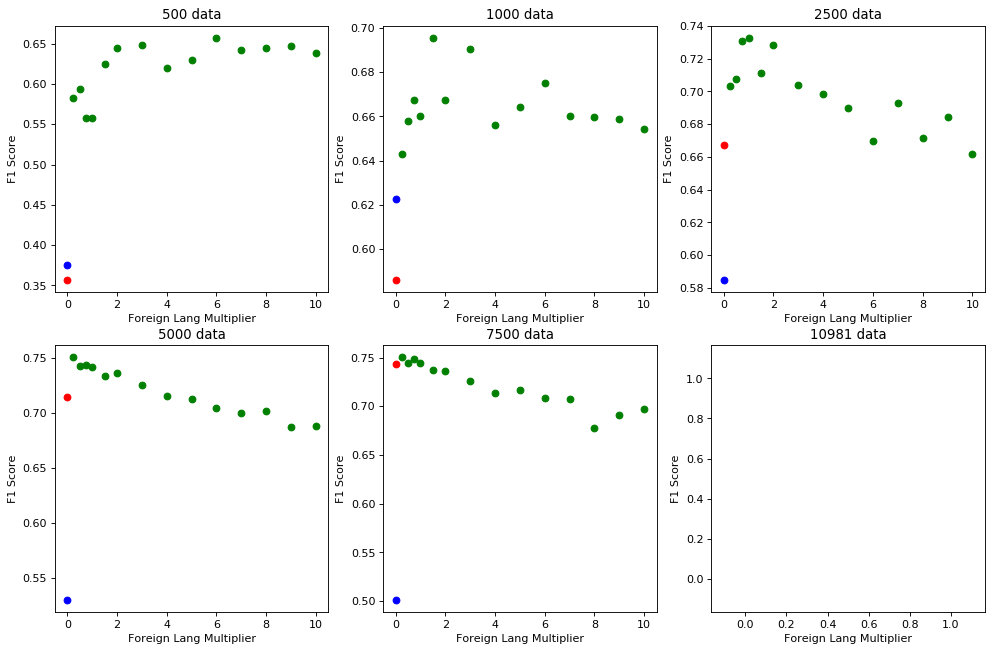

In [9]:
figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
count_plot = 0
for x in total_data:
    count_plot += 1
    plt.subplot(3, 3, count_plot)
    final_result = data[data['total_data'] == x]
    
    plt.plot(np.zeros_like(final_result[final_result['tipe'] == 'A'].max_f1.values), 
             final_result[final_result['tipe'] == 'A'].max_f1.values, 'ro', label='A')

    plt.plot(np.zeros_like(final_result[final_result['tipe'] == 'B'].max_f1.values), 
             final_result[final_result['tipe'] == 'B'].max_f1.values, 'bo', label='B')

    plt.plot(final_result[final_result['tipe'] == 'C'].foreign_mult.values, 
             final_result[final_result['tipe'] == 'C'].max_f1.values, 'go', label='C')

#     plt.legend(loc="lower right")
    plt.xlabel('Foreign Lang Multiplier')
    plt.ylabel('F1 Score')
    plt.title('{} data'.format(x))

#     plt.figtext(.7, .4, "diff = {:.5f}".format(
#         final_result[final_result['tipe'] == 'C'].f1.values[0]
#         -
#         final_result[final_result['tipe'] == 'A'].f1.values[0]))

plt.show()